In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from scipy.cluster.hierarchy import dendrogram

In [12]:
data=pd.read_csv("EWCS_2016.csv")

In [13]:
for i in data.columns:
    for j in range(len(data[i])):
        if(data.loc[j,i]==-999):
            data.loc[j,i]=None

In [14]:
data

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1.0,63.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
1,2.0,58.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
2,2.0,32.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0
3,1.0,35.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0
4,2.0,27.0,2.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
7808,1.0,35.0,3.0,2.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0
7809,1.0,53.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
7810,2.0,39.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0
7811,2.0,75.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,3.0,1.0


In [15]:
data.shape

(7813, 11)

In [16]:
data.head()

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1.0,63.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0
1,2.0,58.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0
2,2.0,32.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0
3,1.0,35.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0
4,2.0,27.0,2.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0


In [17]:
data.isnull().sum()

Q2a      1
Q2b     11
Q87a    28
Q87b    25
Q87c    28
Q87d    26
Q87e    46
Q90a    32
Q90b    32
Q90c    26
Q90f    74
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

Q2a     0
Q2b     0
Q87a    0
Q87b    0
Q87c    0
Q87d    0
Q87e    0
Q90a    0
Q90b    0
Q90c    0
Q90f    0
dtype: int64

In [20]:
data.shape

(7647, 11)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [33]:
dbscan = DBSCAN(eps=2.0)
clusters= dbscan.fit_predict(data_scaled)

In [34]:
pd.Series(clusters).value_counts()

 0    3620
 1    3424
-1     592
 3       6
 2       5
dtype: int64

In [34]:
def plot_dendrogram(model):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

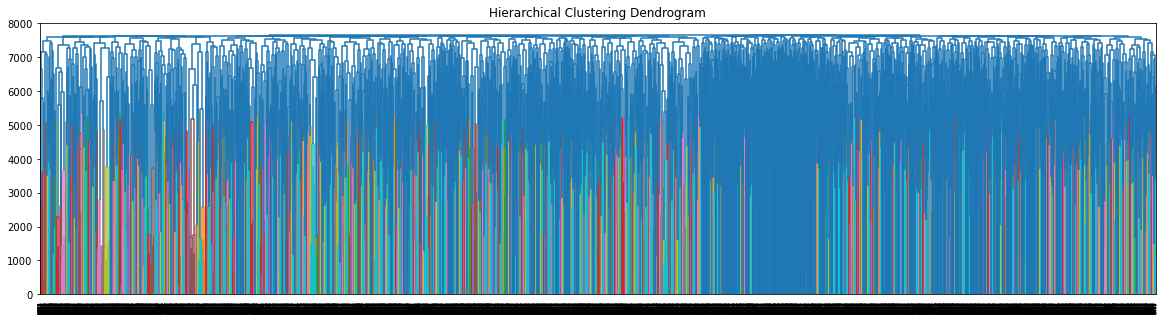

In [35]:
plt.figure(figsize=(20,5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clusters)

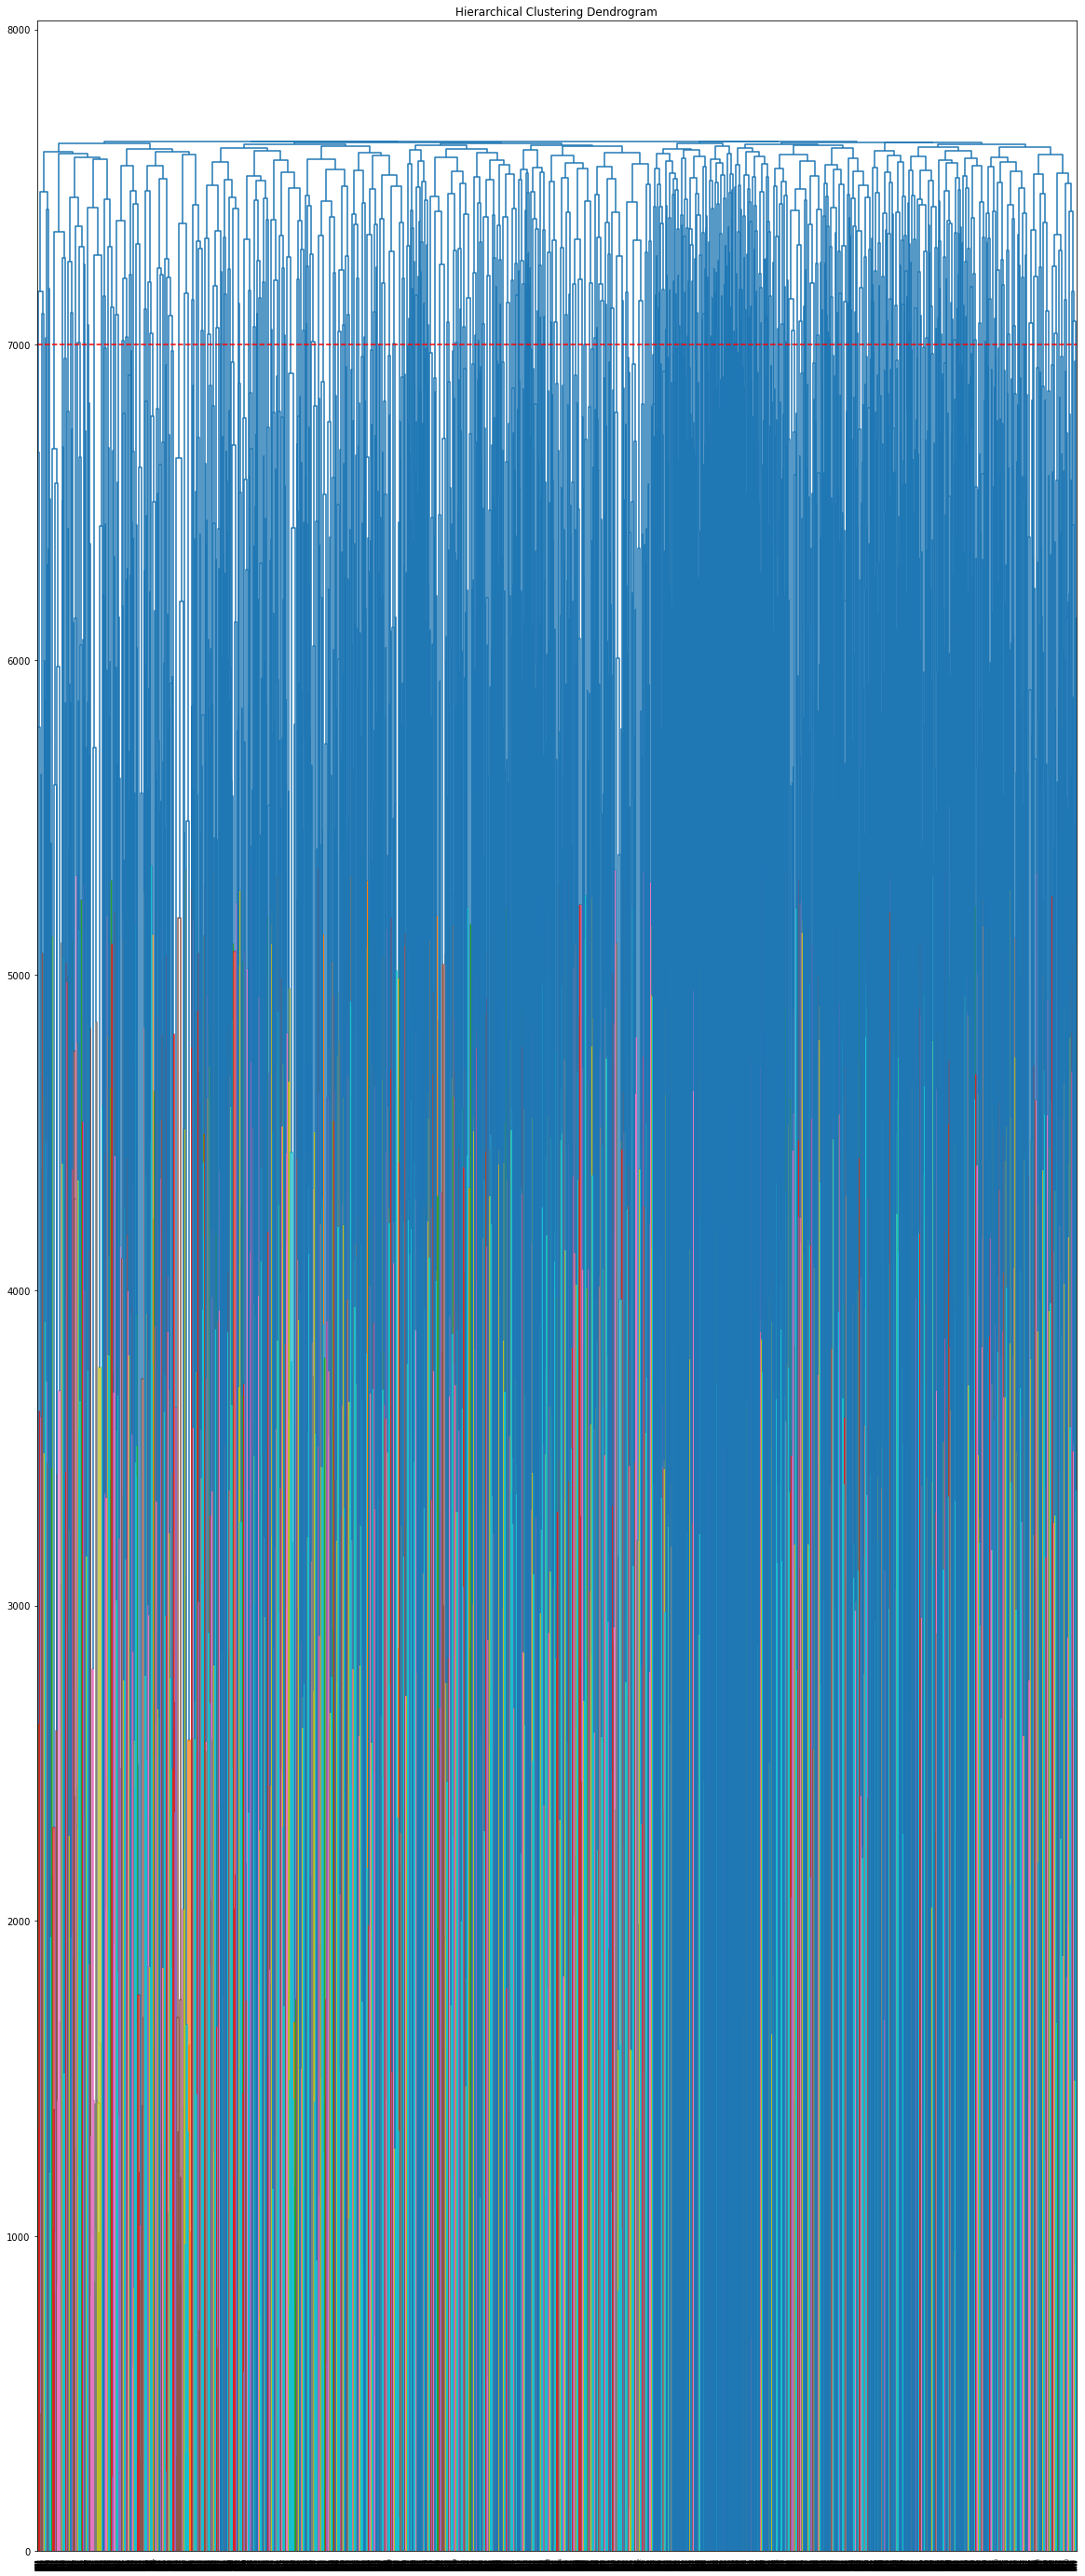

In [37]:
plt.figure(figsize=(20,50))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clusters)
plt.axhline(y=7000, color='r', linestyle='--',)

In [ ]:
agglomirative = AgglomerativeClustering(n_clusters=4)

In [ ]:
clusters = agglomirative.fit(data_scaled)

In [40]:
pd.Series(clusters.labels_).value_counts()

1    2956
0    2496
2    2361
dtype: int64